<a href="https://colab.research.google.com/github/fabianafranca-boop/notebooks-/blob/main/Base_fusionada_men%C3%A7%C3%B5es_IA_(PP1_e_PP2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
base_reclamacoes = pd.read_csv('/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/reclamacoes_enel_equatorial.csv')
base_reclamacoes.head()


/tmp/ipython-input-391721738.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  base_reclamacoes = pd.read_csv('/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/reclamacoes_enel_equatorial.csv')


,name_company,report_status,report_text,report_date,report_place,reponse_company,reponse_company_date,service_note,consumer_consideration
0,enel distribuicao rio (ampla),Resolvido,"empresa colocou servicos nao contratados, que ...",2025-06-11,teresopolis - rj,"ola, !agradecemos o seu contato e a oportunida...",(1 dia(s) depois),5,"resolvido mediante contato, a empresa informou..."
1,enel distribuicao rio (ampla),Resolvido,solicito negociacao procon itaipuacu,2025-06-10,marica - rj,"ola, jose!agradecemos o seu contato e a oportu...",(no mesmo dia),5,excelente atendimento
2,enel distribuicao rio (ampla),Resolvido,solicito encerramento contratual da unidade 51...,2025-06-10,marica - rj,"ola, mauricio!agradecemos o seu contato e a op...",(no mesmo dia),5,agradeco a tabata pela rapida solucao do meu p...
3,enel distribuicao rio (ampla),Resolvido,sou proprietario de um imovel e gostaria de pa...,2025-06-09,resende - rj,"ola, alexandre!agradecemos o seu contato e a o...",(3 dia(s) depois),5,atendente muito atenciosa resolveu com prontid...
4,enel distribuicao rio (ampla),Resolvido,solicito encerramento contratual da unidade 57...,2025-06-09,marica - rj,"ola, jose!agradecemos o seu contato e a oportu...",(no mesmo dia),5,<nao ha comentarios do consumidor>


menção_ia
Não menciona IA    233842
Menciona IA           248
Name: count, dtype: int64


/tmp/ipython-input-1282868023.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quantidade_mencao_ia.index, y=quantidade_mencao_ia.values, palette='viridis')


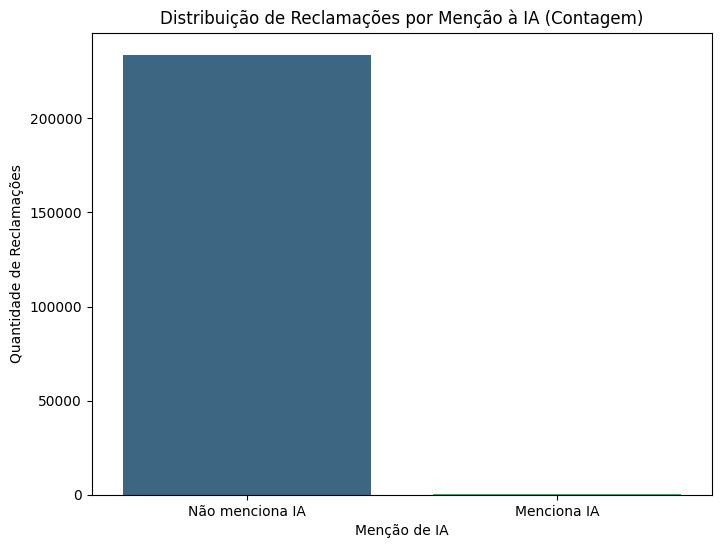

In [ ]:
palavras_ia = ['inteligência artificial', 'chatbot', 'robô', 'robotizado', 'automático', 'automação', 'atendimento automático', 'assistente virtual']
def menciona_ia(texto):
    texto = str(texto).lower()
    for palavra in palavras_ia:
        if palavra in texto:
            return 'Menciona IA'
    return 'Não menciona IA'
base_reclamacoes['menção_ia'] = base_reclamacoes['report_text'].apply(menciona_ia)
quantidade_mencao_ia = base_reclamacoes['menção_ia'].value_counts()
print(quantidade_mencao_ia)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.barplot(x=quantidade_mencao_ia.index, y=quantidade_mencao_ia.values, palette='viridis')
plt.title('Distribuição de Reclamações por Menção à IA (Contagem)')
plt.ylabel('Quantidade de Reclamações')
plt.xlabel('Menção de IA')
plt.show()

In [ ]:
total_reclamacoes = quantidade_mencao_ia.sum()
percentual_mencao_ia = (quantidade_mencao_ia / total_reclamacoes) * 100

print("\nPercentual de menções de IA:")
print(percentual_mencao_ia.round(1))


Percentual de menções de IA:
menção_ia
Não menciona IA    99.9
Menciona IA         0.1
Name: count, dtype: float64


In [ ]:
import pandas as pd

base_reclamacoes = pd.read_csv('/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/saida_gemma2_27b_5k.csv')
base_reclamacoes.head()

,Unnamed: 0,gemma2:27b
0,0,{'input': {'name_company': 'Equatorial Maranhã...
1,1,{'input': {'name_company': 'Enel Distribuição ...
2,2,{'input': {'name_company': 'Enel Distribuição ...
3,3,{'input': {'name_company': 'Enel Distribuição ...
4,4,{'input': {'name_company': 'Enel Distribuição ...


In [ ]:
palavras_ia = ['inteligência artificial', 'chatbot', 'robô', 'robotizado', 'automático', 'automação', 'atendimento automático', 'assistente virtual']

def menciona_ia(texto):
    texto = str(texto).lower()
    for palavra in palavras_ia:
        if palavra in texto:
            return 'Menciona IA'
    return 'Não menciona IA'

import json

def extract_report_text(data):
    try:

        data_dict = json.loads(data)

        return data_dict.get('input', {}).get('report_text', '')
    except (json.JSONDecodeError, AttributeError):

        return ''

base_reclamacoes['extracted_report_text'] = base_reclamacoes['gemma2:27b'].apply(extract_report_text)

base_reclamacoes['menção_ia'] = base_reclamacoes['extracted_report_text'].apply(menciona_ia)

quantidade_mencao_ia = base_reclamacoes['menção_ia'].value_counts()
print(quantidade_mencao_ia)

menção_ia
Não menciona IA    2500
Name: count, dtype: int64


In [ ]:
total_reclamacoes = quantidade_mencao_ia.sum()

percentual_mencao_ia = (quantidade_mencao_ia / total_reclamacoes) * 100

print("\nPercentual de menções de IA:")
print(percentual_mencao_ia.round(1))


Percentual de menções de IA:
menção_ia
Não menciona IA    100.0
Name: count, dtype: float64


In [ ]:
import pandas as pd

base_reclamacoes = pd.read_csv('/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/saida_llama38b_5k.csv')

base_reclamacoes.head()

,Unnamed: 0,llama3.1:8b
0,0,{'input': {'name_company': 'Equatorial Maranhã...
1,1,{'input': {'name_company': 'Enel Distribuição ...
2,2,{'input': {'name_company': 'Enel Distribuição ...
3,3,{'input': {'name_company': 'Enel Distribuição ...
4,4,{'input': {'name_company': 'Enel Distribuição ...


In [ ]:
palavras_ia = ['inteligência artificial', 'chatbot', 'robô', 'robotizado', 'automático', 'automação', 'atendimento automático', 'assistente virtual']

def menciona_ia(texto):
    texto = str(texto).lower()
    for palavra in palavras_ia:
        if palavra in texto:
            return 'Menciona IA'
    return 'Não menciona IA'

import json

def extract_report_text(data):
    try:

        data_dict = json.loads(data)

        return data_dict.get('input', {}).get('report_text', '')
    except (json.JSONDecodeError, AttributeError):

        return ''

base_reclamacoes['extracted_report_text'] = base_reclamacoes['llama3.1:8b'].apply(extract_report_text)


base_reclamacoes['menção_ia'] = base_reclamacoes['extracted_report_text'].apply(menciona_ia)

quantidade_mencao_ia = base_reclamacoes['menção_ia'].value_counts()
print(quantidade_mencao_ia)

menção_ia
Não menciona IA    5000
Name: count, dtype: int64


In [ ]:
total_reclamacoes = quantidade_mencao_ia.sum()

percentual_mencao_ia = (quantidade_mencao_ia / total_reclamacoes) * 100

print("\nPercentual de menções de IA:")
print(percentual_mencao_ia.round(1))


Percentual de menções de IA:
menção_ia
Não menciona IA    100.0
Name: count, dtype: float64


In [ ]:
import pandas as pd

base_reclamacoes = pd.read_csv('/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/saida_llama38b_output.csv')

base_reclamacoes.head()

,Unnamed: 0,llama3.1:8b_output
0,0,"{\n ""format"": ""JSON"",\n ""fields"": {\n ""no..."
1,1,"{\n ""format"": ""JSON"",\n ""data"": [\n {\n ..."
2,2,"{""format"": ""JSON"", ""fields"": {""name_company"": ..."
3,3,"{\n ""format"": ""JSON"",\n ""fields"": {\n ..."
4,4,"{\n\n ""format"": ""JSON"",\n ""fields"": {\n ""..."


In [ ]:
palavras_ia = ['inteligência artificial', 'chatbot', 'robô', 'robotizado', 'automático', 'automação', 'atendimento automático', 'assistente virtual']

def menciona_ia(texto):
    texto = str(texto).lower()
    for palavra in palavras_ia:
        if palavra in texto:
            return 'Menciona IA'
    return 'Não menciona IA'

import json

def extract_report_text(data):
    try:

        data_dict = json.loads(data)

        if isinstance(data_dict.get('fields'), dict):
            report_text = data_dict['fields'].get('report_text', '')
            if report_text and report_text != "Texto da reclamação":
                return report_text

        if isinstance(data_dict.get('data'), list) and len(data_dict['data']) > 0 and isinstance(data_dict['data'][0], dict):
             report_text = data_dict['data'][0].get('report_text', '')
             if report_text:
                 return report_text


        return ''

    except (json.JSONDecodeError, AttributeError):

        return ''

base_reclamacoes['extracted_report_text'] = base_reclamacoes['llama3.1:8b_output'].apply(extract_report_text)

base_reclamacoes['menção_ia'] = base_reclamacoes['extracted_report_text'].apply(menciona_ia)

quantidade_mencao_ia = base_reclamacoes['menção_ia'].value_counts()
print(quantidade_mencao_ia)

menção_ia
Não menciona IA    2490
Menciona IA          10
Name: count, dtype: int64


In [ ]:
total_reclamacoes = quantidade_mencao_ia.sum()

percentual_mencao_ia = (quantidade_mencao_ia / total_reclamacoes) * 100

print("\nPercentual de menções de IA:")
print(percentual_mencao_ia.round(1))


Percentual de menções de IA:
menção_ia
Não menciona IA    99.6
Menciona IA         0.4
Name: count, dtype: float64


In [ ]:
import pandas as pd

base_reclamacoes = pd.read_csv('/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/saida_llama38b_text.csv')

base_reclamacoes.head()

,Unnamed: 0,llama3.1:8b
0,0,{'input': {'name_company': 'Equatorial Maranhã...
1,1,{'input': {'name_company': 'Enel Distribuição ...
2,2,{'input': {'name_company': 'Enel Distribuição ...
3,3,{'input': {'name_company': 'Enel Distribuição ...
4,4,{'input': {'name_company': 'Enel Distribuição ...


In [ ]:
palavras_ia = ['inteligência artificial', 'chatbot', 'robô', 'robotizado', 'automático', 'automação', 'atendimento automático', 'assistente virtual']

def menciona_ia(texto):
    texto = str(texto).lower()
    for palavra in palavras_ia:
        if palavra in texto:
            return 'Menciona IA'
    return 'Não menciona IA'

import json

def extract_report_text(data):
    try:

        data_dict = json.loads(data)

        return data_dict.get('input', {}).get('report_text', '')
    except (json.JSONDecodeError, AttributeError):

        return ''

base_reclamacoes['extracted_report_text'] = base_reclamacoes['llama3.1:8b'].apply(extract_report_text)


base_reclamacoes['menção_ia'] = base_reclamacoes['extracted_report_text'].apply(menciona_ia)

quantidade_mencao_ia = base_reclamacoes['menção_ia'].value_counts()
print(quantidade_mencao_ia)

menção_ia
Não menciona IA    2500
Name: count, dtype: int64


In [ ]:
total_reclamacoes = quantidade_mencao_ia.sum()

percentual_mencao_ia = (quantidade_mencao_ia / total_reclamacoes) * 100

print("\nPercentual de menções de IA:")
print(percentual_mencao_ia.round(1))


Percentual de menções de IA:
menção_ia
Não menciona IA    100.0
Name: count, dtype: float64


In [ ]:
import pandas as pd

base_reclamacoes = pd.read_csv('/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/saida_ollama_text.csv')

base_reclamacoes.head()

,Unnamed: 0,llama3.1:8b
0,0,{'input': {'name_company': 'Equatorial Maranhã...
1,1,{'input': {'name_company': 'Enel Distribuição ...
2,2,{'input': {'name_company': 'Enel Distribuição ...
3,3,{'input': {'name_company': 'Enel Distribuição ...
4,4,{'input': {'name_company': 'Enel Distribuição ...


In [ ]:
palavras_ia = ['inteligência artificial', 'chatbot', 'robô', 'robotizado', 'automático', 'automação', 'atendimento automático', 'assistente virtual']
def menciona_ia(texto):
    texto = str(texto).lower()
    for palavra in palavras_ia:
        if palavra in texto:
            return 'Menciona IA'
    return 'Não menciona IA'

import json

def extract_report_text(data):
    try:

        data_dict = json.loads(data)

        return data_dict.get('input', {}).get('report_text', '')
    except (json.JSONDecodeError, AttributeError):

        return ''

base_reclamacoes['extracted_report_text'] = base_reclamacoes['llama3.1:8b'].apply(extract_report_text)

base_reclamacoes['menção_ia'] = base_reclamacoes['extracted_report_text'].apply(menciona_ia)

quantidade_mencao_ia = base_reclamacoes['menção_ia'].value_counts()
print(quantidade_mencao_ia)

menção_ia
Não menciona IA    500
Name: count, dtype: int64


In [ ]:
import pandas as pd
import json
from pathlib import Path

PALAVRAS_IA = [
    'inteligência artificial', 'chatbot', 'robô', 'robotizado', 'automático', 'automação', 'atendimento automático', 'assistente virtual'
]

def menciona_ia(texto):
    t = str(texto).lower()
    return "Menciona IA" if any(p in t for p in PALAVRAS_IA) else "Não menciona IA"

POSSIVEIS_COLUNAS_TEXTO = [
    'report_text','text','saida','output','mensagem','conteudo','extracted_report_text'
]

CHAVES_JSON_PREFERIDAS = ['report_text','text','entrada','content']

def extrai_texto_de_json(celula):
    """
    Tenta fazer json.loads e procurar por report_text/text/entrada/content,
    inclusive dentro de objetos aninhados ou listas.
    """
    try:
        data = json.loads(str(celula))
    except Exception:
        return None

    def busca(d):
        if isinstance(d, dict):

            for k in CHAVES_JSON_PREFERIDAS:
                if k in d and isinstance(d[k], (str,int,float)):
                    return str(d[k])

            if 'input' in d and isinstance(d['input'], dict):
                r = busca(d['input'])
                if r: return r

            for k in ['data','fields','outputs','predictions','choices']:
                if k in d:
                    r = busca(d[k])
                    if r: return r

            for v in d.values():
                r = busca(v)
                if r: return r
        elif isinstance(d, list) and d:
            for item in d:
                r = busca(item)
                if r: return r
        return None

    return busca(data)

def padroniza_base(caminho_csv, nome_base, modelo="LLM"):
    """
    Lê o CSV, tenta achar a coluna de texto. Se vier em JSON, extrai.
    Retorna dataframe com colunas: base, entrada, saida, modelo.
    """
    df = pd.read_csv(caminho_csv, dtype=str, encoding="utf-8", on_bad_lines="skip")
    entrada = None

    for c in POSSIVEIS_COLUNAS_TEXTO:
        if c in df.columns:
            entrada = df[c]
            break

    if entrada is None:
        candidatos_json = [c for c in df.columns if any(x in c.lower() for x in ['gemma','llama','ollama','model','output','prediction'])]
        if candidatos_json:
            coljson = candidatos_json[0]
            entrada = df[coljson].apply(extrai_texto_de_json)

    if entrada is None:
        obj_cols = [c for c in df.columns if df[c].dtype == 'object']
        if not obj_cols:
            raise ValueError(f"Não encontrei coluna de texto em {nome_base}.")
        entrada = df[obj_cols[0]]

    df_pad = pd.DataFrame({
        "base": nome_base,
        "entrada": entrada.fillna(""),
    })
    df_pad["saida"]  = df_pad["entrada"].apply(menciona_ia)
    df_pad["modelo"] = modelo
    return df_pad


In [ ]:
CAMINHO_SUA_BASE = "/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/reclamacoes_enel_equatorial.csv"

df_sua = pd.read_csv(CAMINHO_SUA_BASE, dtype=str, encoding="utf-8", on_bad_lines="skip")

col_texto_sua = "report_text"
if col_texto_sua not in df_sua.columns:
    raise ValueError(f"Sua base não tem a coluna '{col_texto_sua}'. Quais colunas existem? {list(df_sua.columns)}")

df_lexico = pd.DataFrame({
    "base": "base_consolidada_advogada",
    "entrada": df_sua[col_texto_sua].fillna(""),
})
df_lexico["saida"]  = df_lexico["entrada"].apply(menciona_ia)
df_lexico["modelo"] = "Léxico"

print("Exemplo da sua base padronizada:")
df_lexico.head(3)


Exemplo da sua base padronizada:


,base,entrada,saida,modelo
0,base_consolidada_advogada,"empresa colocou servicos nao contratados, que ...",Não menciona IA,Léxico
1,base_consolidada_advogada,solicito negociacao procon itaipuacu,Não menciona IA,Léxico
2,base_consolidada_advogada,solicito encerramento contratual da unidade 51...,Não menciona IA,Léxico


In [ ]:
CAMINHO_GEMMA   = "/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/saida_gemma2_27b_5k.csv"
CAMINHO_L38_5K  = "/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/saida_llama38b_5k.csv"
CAMINHO_L38_OUT = "/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/saida_llama38b_output.csv"
CAMINHO_L38_TXT = "/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/saida_llama38b_text.csv"
CAMINHO_OLLAMA  = "/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/saida_ollama_text.csv"

df_gemma   = padroniza_base(CAMINHO_GEMMA,   "saida_gemma2_27b_5k",  modelo="LLM")
df_l38_5k  = padroniza_base(CAMINHO_L38_5K,  "saida_llama38b_5k",    modelo="LLM")
df_l38_out = padroniza_base(CAMINHO_L38_OUT, "saida_llama38b_output",modelo="LLM")
df_l38_txt = padroniza_base(CAMINHO_L38_TXT, "saida_llama38b_text",  modelo="LLM")
df_ollama  = padroniza_base(CAMINHO_OLLAMA,  "saida_ollama_text",    modelo="LLM")

print("Exemplos (2 linhas de cada):")
display(pd.concat([
    df_gemma.head(2),
    df_l38_5k.head(2),
    df_l38_out.head(2),
    df_l38_txt.head(2),
    df_ollama.head(2)
], ignore_index=True))

Exemplos (2 linhas de cada):


,base,entrada,saida,modelo
0,saida_gemma2_27b_5k,,Não menciona IA,LLM
1,saida_gemma2_27b_5k,,Não menciona IA,LLM
2,saida_llama38b_5k,,Não menciona IA,LLM
3,saida_llama38b_5k,,Não menciona IA,LLM
4,saida_llama38b_output,,Não menciona IA,LLM
5,saida_llama38b_output,A dois meses atrás meu medido foi trocado mais minha energia está vindo um absurdo dobrou o valor do que vinha no mês eu pagava abaixo de 68 hoje o papel vêm o dobro sem eu almenta nada dentro de ...,Não menciona IA,LLM
6,saida_llama38b_text,,Não menciona IA,LLM
7,saida_llama38b_text,,Não menciona IA,LLM
8,saida_ollama_text,,Não menciona IA,LLM
9,saida_ollama_text,,Não menciona IA,LLM


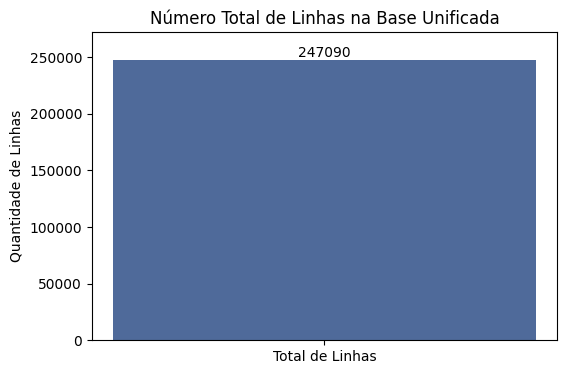

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

if 'base_unica' in locals() and isinstance(base_unica, pd.DataFrame):
    total_linhas = len(base_unica)

    plt.figure(figsize=(6, 4))
    plt.bar(['Total de Linhas'], [total_linhas], color='#4F6A9A')
    plt.ylabel('Quantidade de Linhas')
    plt.title('Número Total de Linhas na Base Unificada')
    plt.ylim(0, total_linhas * 1.1)
    plt.text('Total de Linhas', total_linhas, str(total_linhas), ha='center', va='bottom')
    plt.show()
else:
    print("O DataFrame 'base_unica' não está disponível.")
    print("Por favor, execute as células anteriores para criar a base unificada.")

In [ ]:
CAMINHO_GEMMA   = "/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/saida_gemma2_27b_5k.csv"
CAMINHO_L38_5K  = "/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/saida_llama38b_5k.csv"
CAMINHO_L38_OUT = "/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/saida_llama38b_output.csv"
CAMINHO_L38_TXT = "/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/saida_llama38b_text.csv"
CAMINHO_OLLAMA  = "/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/saida_ollama_text.csv"

try:
    df_gemma   = padroniza_base(CAMINHO_GEMMA,   "saida_gemma2_27b_5k",  modelo="LLM")
except Exception as e:
    print(f"Erro ao carregar {CAMINHO_GEMMA}: {e}")
    df_gemma = pd.DataFrame({"base": [], "entrada": [], "saida": [], "modelo": []})

try:
    df_l38_5k  = padroniza_base(CAMINHO_L38_5K,  "saida_llama38b_5k",    modelo="LLM")
except Exception as e:
    print(f"Erro ao carregar {CAMINHO_L38_5K}: {e}")
    df_l38_5k = pd.DataFrame({"base": [], "entrada": [], "saida": [], "modelo": []})

try:
    df_l38_out = padroniza_base(CAMINHO_L38_OUT, "saida_llama38b_output",modelo="LLM")
except Exception as e:
    print(f"Erro ao carregar {CAMINHO_L38_OUT}: {e}")
    df_l38_out = pd.DataFrame({"base": [], "entrada": [], "saida": [], "modelo": []})

try:
    df_l38_txt = padroniza_base(CAMINHO_L38_TXT, "saida_llama38b_text",  modelo="LLM")
except Exception as e:
    print(f"Erro ao carregar {CAMINHO_L38_TXT}: {e}")
    df_l38_txt = pd.DataFrame({"base": [], "entrada": [], "saida": [], "modelo": []})

try:
    df_ollama  = padroniza_base(CAMINHO_OLLAMA,  "saida_ollama_text",    modelo="LLM")
except Exception as e:
    print(f"Erro ao carregar {CAMINHO_OLLAMA}: {e}")
    df_ollama = pd.DataFrame({"base": [], "entrada": [], "saida": [], "modelo": []})

base_unica = pd.concat(
    [df_lexico, df_gemma, df_l38_5k, df_l38_out, df_l38_txt, df_ollama],
    ignore_index=True
)

print("Formato final:", base_unica.shape)
print(base_unica.head(5))

print("\nContagem por modelo:")
print(base_unica.groupby("modelo")["saida"].value_counts().unstack(fill_value=0))

print("\nContagem por base (primeiras 10):")
print(base_unica.groupby("base")["saida"].value_counts().unstack(fill_value=0).head(10))

pct_geral = (base_unica["saida"].eq("Menciona IA").mean() * 100).round(2)
print(f"\nPercentual GERAL de menções à IA na base unificada: {pct_geral}%")

Formato final: (247090, 4)
                        base  \
0  base_consolidada_advogada   
1  base_consolidada_advogada   
2  base_consolidada_advogada   
3  base_consolidada_advogada   
4  base_consolidada_advogada   

                                             entrada            saida  modelo  
0  empresa colocou servicos nao contratados, que ...  Não menciona IA  Léxico  
1               solicito negociacao procon itaipuacu  Não menciona IA  Léxico  
2  solicito encerramento contratual da unidade 51...  Não menciona IA  Léxico  
3  sou proprietario de um imovel e gostaria de pa...  Não menciona IA  Léxico  
4  solicito encerramento contratual da unidade 57...  Não menciona IA  Léxico  

Contagem por modelo:
saida   Menciona IA  Não menciona IA
modelo                              
LLM              14            12986
Léxico          248           233842

Contagem por base (primeiras 10):
saida                      Menciona IA  Não menciona IA
base                                   

<Figure size 1200x700 with 0 Axes>

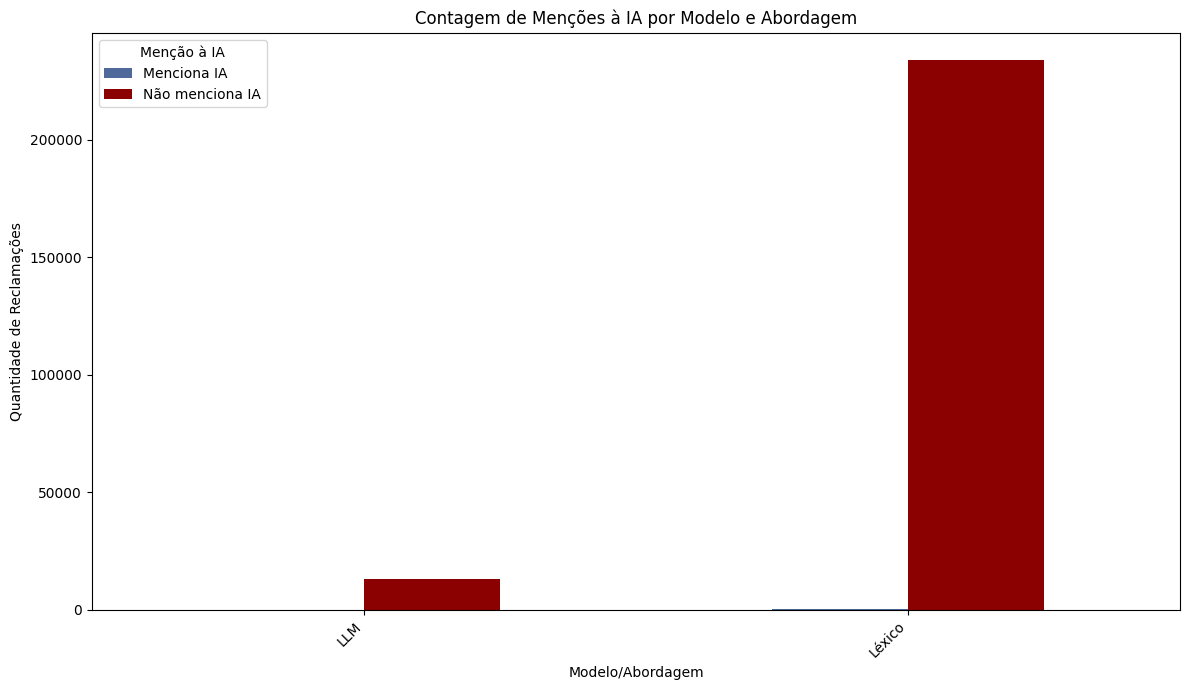

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_data = base_unica.groupby('modelo')['saida'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(12, 7))
plot_data.plot(kind='bar', stacked=False, figsize=(12, 7), color=['#4F6A9A', '#8B0000']) # Use different colors
plt.title('Contagem de Menções à IA por Modelo e Abordagem')
plt.ylabel('Quantidade de Reclamações')
plt.xlabel('Modelo/Abordagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Menção à IA')
plt.tight_layout()
plt.show()

In [ ]:
SAIDA_CSV_LOCAL = "/content/base_unica_mencoes_ia.csv"
base_unica.to_csv(SAIDA_CSV_LOCAL, index=False, encoding="utf-8")
print(f"Arquivo salvo localmente em: {SAIDA_CSV_LOCAL}")

SAIDA_CSV_DRIVE = "/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/base_unica_mencoes_ia.csv"
base_unica.to_csv(SAIDA_CSV_DRIVE, index=False, encoding="utf-8")
print(f"Arquivo salvo no Google Drive em: {SAIDA_CSV_DRIVE}")

Arquivo salvo localmente em: /content/base_unica_mencoes_ia.csv
Arquivo salvo no Google Drive em: /content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/base_unica_mencoes_ia.csv


In [ ]:
SAIDA_CSV_LOCAL = "/content/base_unica_mencoes_ia.csv"
base_unica.to_csv(SAIDA_CSV_LOCAL, index=False, encoding="utf-8")
print(f"Arquivo salvo localmente em: {SAIDA_CSV_LOCAL}")

SAIDA_CSV_DRIVE = "/content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/base_unica_mencoes_ia.csv"

import os
drive_dir = os.path.dirname(SAIDA_CSV_DRIVE)
if not os.path.exists(drive_dir):
    os.makedirs(drive_dir)

base_unica.to_csv(SAIDA_CSV_DRIVE, index=False, encoding="utf-8")
print(f"Arquivo salvo no Google Drive em: {SAIDA_CSV_DRIVE}")

print("\nPara baixar o arquivo localmente:")
print(f"1. Clique no ícone de 'Arquivos' (pasta) na barra lateral esquerda.")
print(f"2. Navegue até '/content/'.")
print(f"3. Clique nos três pontos ao lado de '{os.path.basename(SAIDA_CSV_LOCAL)}'.")
print("4. Selecione 'Fazer download'.")

Arquivo salvo localmente em: /content/base_unica_mencoes_ia.csv
Arquivo salvo no Google Drive em: /content/drive/MyDrive/MBA USP/MBA USP/TCC 05_08_2025/base_unica_mencoes_ia.csv

Para baixar o arquivo localmente:
1. Clique no ícone de 'Arquivos' (pasta) na barra lateral esquerda.
2. Navegue até '/content/'.
3. Clique nos três pontos ao lado de 'base_unica_mencoes_ia.csv'.
4. Selecione 'Fazer download'.
